Dataset: [Diabetes](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df_diabetes = pd.read_csv("/content/diabetes.csv")
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [57]:
df_diabetes.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [58]:
df_diabetes.isnull().sum().sum()

0

In [59]:
X = df_diabetes.drop("Outcome", axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [60]:
y = df_diabetes["Outcome"]
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(537, 8) (231, 8)
(537,) (231,)


In [65]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)

In [66]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, random_state=42)

In [67]:
from sklearn.metrics import accuracy_score

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El accuracy en train es: {train_accuracy}")
print(f"El accuracy en test es: {test_accuracy}")

El accuracy en train es: 0.9851024208566108
El accuracy en test es: 0.7489177489177489


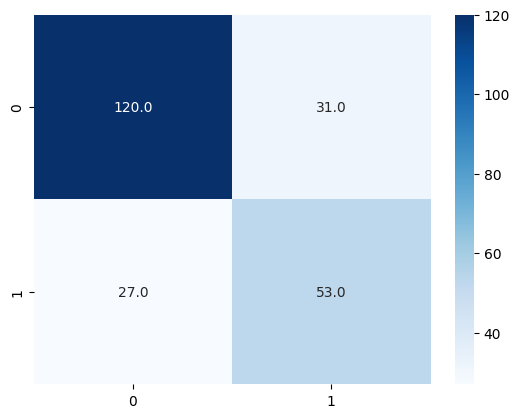

In [70]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt=".1f",cmap="Blues")
plt.show()

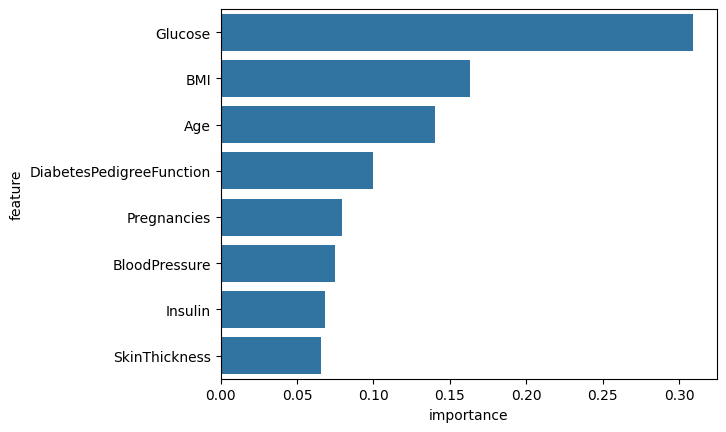

In [74]:
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance":rf.feature_importances_}
    ).sort_values(by="importance", ascending=False)
sns.barplot(x=feature_importances_df.importance, y=feature_importances_df.feature)
plt.show()